# Analysis: Distributions
Peter Sharpe

What's the distribution of monthly S&P500 returns?


Imports and setup:

In [12]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(font_scale=1)
import pandas as pd
import os

Now, let's re-run our autocorrelation analysis:

No handles with labels found to put in legend.


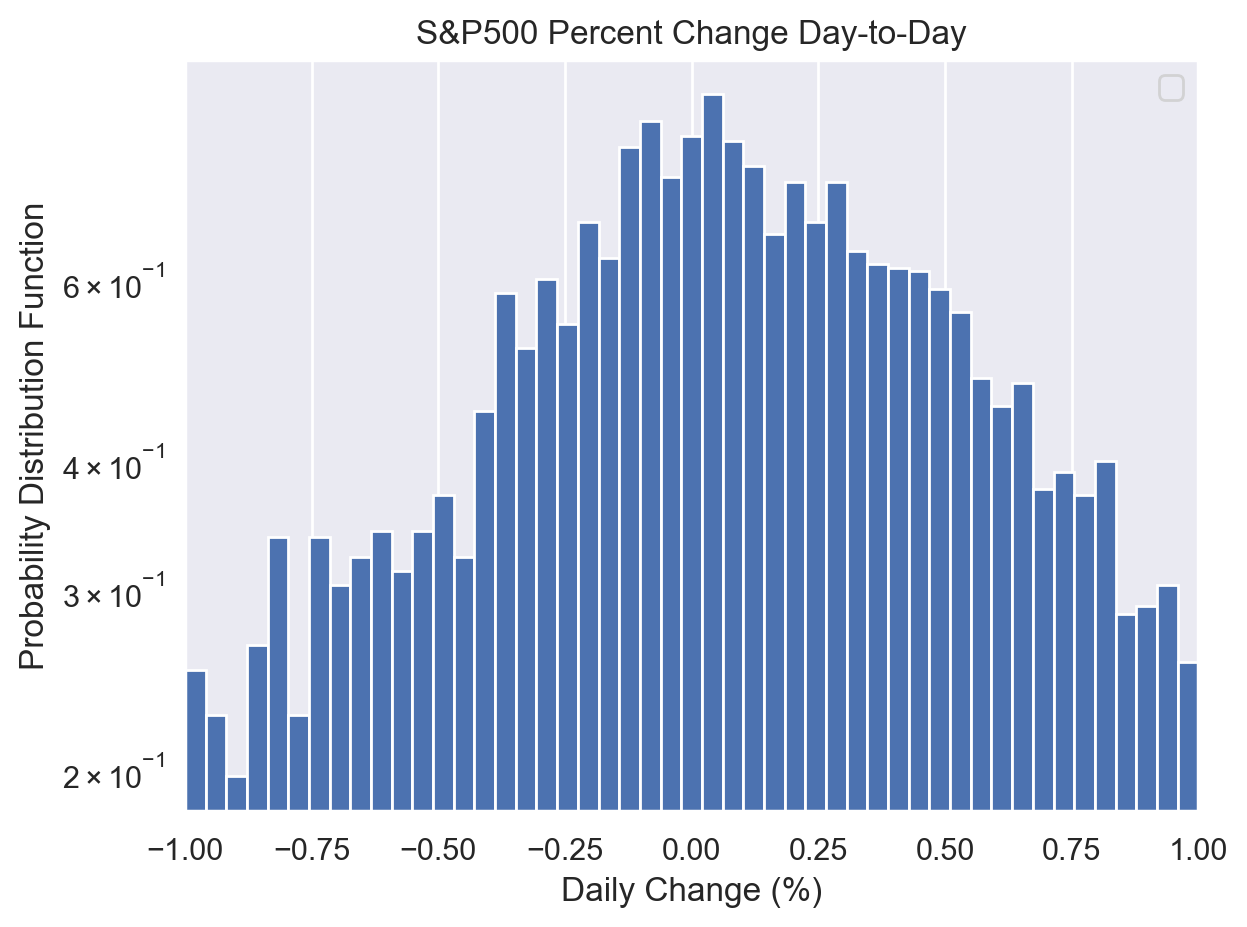

In [14]:
ticker= "SPY"
stock = yf.Ticker(ticker)
data = stock.history(period="max", interval="1d")
# data = pd.read_csv(
#     os.path.abspath("../data/sp_500_max.csv"),
#     sep=","
# )


change = (
    data["Close"].iloc[1:].values /
    data["Close"].iloc[:-1].values
)
change_pct = (change - 1) * 100

hist_xscl = 1
def make_pct_hist():
    fig, ax = plt.subplots(1, 1, figsize=(6.4, 4.8), dpi=200)
    plt.hist(
        x=change_pct,
        bins=np.linspace(-hist_xscl, hist_xscl, 50),
        density=True,
    )
def show_pct_hist():
    plt.xlim(-hist_xscl, hist_xscl)
    plt.yscale('log')
    plt.xlabel(r"Daily Change (%)")
    plt.ylabel(r"Probability Distribution Function")
    plt.title(r"S&P500 Percent Change Day-to-Day")
    plt.tight_layout()
    plt.legend()
    # plt.savefig("C:/Users/User/Downloads/temp.svg")
    plt.show()

make_pct_hist()
show_pct_hist()


In [19]:
from scipy import stats

laplace_params = stats.laplace.fit(
    data = change_pct
)
print(f"laplace_params = {laplace_params}")

laplace_params = (0.06664652979518582, 0.7803555275686522)
